# SDS_Meal prediction PROJECT

## 0. Defining Domain Knowledge
>  PROBLEM:: 구내식당의 BRAND별 메뉴 선택이 항상 달라지기 때문에 식자재가 부족하거나 남는 등의 문제가 발생한다.  
> OBJECT:: 구내식당의 BRAND별 MENU 판매수량을 정확히 예상할 수 있다면 보다 효율적이고 경제적인 재료 준비가 가능해질 것이다.  
> Example: What will be the demand for the brand, ‘Korean 1’ on 2019-11-01?

## 1. DATA 확인하기

### 1-1. 데이터로드 및 병합(concat, append)

In [670]:
import pandas as pd
import numpy as np

In [671]:
meal1 = pd.read_csv('meal.csv')
meal2 = pd.read_csv('mealData_meal_0525_0731.csv')
test1 = pd.read_csv('mealData_customer_0525_0731.csv')
test2 = pd.read_csv('customer_info.csv')

In [672]:
df1 = pd.DataFrame(meal1)
df2 = pd.DataFrame(meal2)
df3= pd.DataFrame(test1)
df4= pd.DataFrame(test2)

In [673]:
customer=df3.append(df4, ignore_index = True)

In [674]:
meal = df1.append(df2, ignore_index = True)

In [675]:
meal.head()

,SELL_DATE,CUSTOMER_ID,BRAND,MENU,PRICE,QUANTITY
0,2018-01-02,2718043,Chef`sCounter,헬스기빙,6500,1
1,2018-01-02,2271646,우리미각면,의령온메밀국수,6000,1
2,2018-01-02,2577432,나폴리폴리,이탈리안포크라이스,6000,1
3,2018-01-02,2048428,우리미각면,의령온메밀국수,6000,1
4,2018-01-02,2554917,TakeOut,쌈밥,5500,1


In [676]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169328 entries, 0 to 1169327
Data columns (total 6 columns):
SELL_DATE      1169328 non-null object
CUSTOMER_ID    1169328 non-null int64
BRAND          1169328 non-null object
MENU           1169328 non-null object
PRICE          1169328 non-null int64
QUANTITY       1169328 non-null int64
dtypes: int64(3), object(3)
memory usage: 53.5+ MB


- rows의 수는 1169328이다
- 모든 column의 Data가 non-null 값임을 알 수 있다.

In [677]:
customer.head()

,CUSTOMER_ID,GENDER,BIRTH_YEAR
0,2673054,남,1983
1,2036804,남,1973
2,2639594,남,1969
3,2307203,남,1983
4,2215015,남,1972


In [678]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17600 entries, 0 to 17599
Data columns (total 3 columns):
CUSTOMER_ID    17600 non-null int64
GENDER         17600 non-null object
BIRTH_YEAR     17600 non-null int64
dtypes: int64(2), object(1)
memory usage: 412.6+ KB


- rows의 수는 17600이다
- 모든 column이 non-null 값임을 알 수 있다

In [615]:
len(customer)

17600

### 1-2 CUSTOMER에서 중복항목 제거
> 이 과정이 없으면 merge 또는 left join시 customer_id를 key 값으로 묶을 때 하나의 customer_id에 한 개 이상의 값이 매핑되는 문제가 발생하여  
원래 데이터의 행 값보다 더 큰 값이 나오게 된다. 따라서 먼저 중복제거 후 merge 또는 left join을 하는 것이 좋다.  
위에서는 17600개인데 아래 중복을 제거하고 나면 11023으로 줄어든다.

In [679]:
customer = customer.drop_duplicates()

In [680]:
len(customer)

11023

### 1-3. meal data와 customer데이터 merge

In [681]:
df = pd.merge(meal, customer, how="left", on="CUSTOMER_ID")

In [682]:
df.tail()

,SELL_DATE,CUSTOMER_ID,BRAND,MENU,PRICE,QUANTITY,GENDER,BIRTH_YEAR
1169323,2019-07-31,2764542,TakeOut,3종 선택 과일,6000,1,여,1989.0
1169324,2019-07-31,2674091,가츠엔,갈릭돈가스,6500,1,여,1987.0
1169325,2019-07-31,2839111,탕맛기픈,개성왕만두국,6000,1,여,1977.0
1169326,2019-07-31,2045716,가츠엔,갈릭돈가스,6500,1,남,1980.0
1169327,2019-07-31,2674091,나폴리폴리,고구마조각피자,6000,1,여,1987.0


### 1-4 DATA별 확인


**Factors affecting the demand:**  
 **기존 Data**  
   1) Supplier (Restaurants) Side
    - Price
   2) Customer Side
    - Gender
    - Age (or Age group)
    
   3) External Side
    - Day of the week
    - Temperature
    - Raining
    - Humidity

### Supplier side
#### 1-4-1. PRICE

In [559]:
df['PRICE'].max()

6500

In [570]:
df['PRICE'].min()

3500

In [560]:
import matplotlib 
import matplotlib.pyplot as plt

In [602]:
price = pd.Series(df['PRICE'])

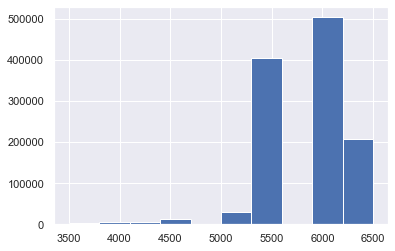

In [603]:
price.hist()

해석: 평균적으로 6000원대를 가장 선호, 6000원 초과는 절반 이하, 5500 이하는 거의 먹지 않음.  
+5000원 이하 메뉴 자체가 적을 수도 있음

### Customer Side
#### 1-4-2. GENDER 

In [631]:
from IPython.display import Image

In [647]:
Image(url = 'gender_rate.png', width = 400)

In [690]:
df['GENDER'].value_counts()

남    873343
여    295840
Name: GENDER, dtype: int64

In [691]:
873343/(873343+295840)*100

74.69686097043832

남성과 여성의 비율은 약 75:25 정도이고,
구내식당에서 남성이 식사를 한 비율은 74.69%로 성비와 거의 유사함.

In [642]:
Image(url= 'gender.png')

다른 브랜드들에 비해 2,3,4번째 브랜드가 수요가 많은 편이며, 해당 브랜드들이 또한 여성의 비율이 높은 편.  
2 = KOREAN1  
3 = KOREAN2   
4 = TAKEOUT  

#### 1-4-3. AGE

In [694]:
Image(url = 'birth_year.png')

성별에서도 살펴봤듯이, 다른 브랜드들에 비해 2,3,4번째 브랜드가 젊은층(초록색, 노란색)의 비율이 높은 편이다. 

### External Side
#### 1-4-4. Day of the week 

In [700]:
Image(url = 'weekday.png')

### 2. DATA 추가/변경

> 예측을 보다 정확하게 하기 위해 현재 주어진 자료를 바탕으로 추가할 수 있는 데이터를 추가해준다.  
> 추가: 1. 날씨 정보(맑음/흐림, 비O/X, 습도), 2. 미세먼지 농도량 (상, 중, 하) 등  
> 변경: 1. SELL_DATE은 요일정보로 변경한다

### 2-1. WEATHER DATA 추가

#### 2-1-1 Temperature

In [696]:
Image(url='temperature.png')

#### 2-1-2 Raining  :: **추가예정**

#### 2-1-3 Humidity

In [697]:
Image(url= 'humidity.png')

#### 2-1-4 Fine dust(미세먼지) :: **추가예정**

## 3. Feature Engineering

숫자가 아닌 GENDER, BIRTH_YEAR, BRAND columns는 수치화 할 예정이며, 요일, 온도, 습도 등의 데이터는 구간을 적용해 다시 추가할 예정이다. 또한 모델링에 불필요해 보이는 자료는 제거할 예정이다.

## 4. Modeling

> 브랜드별 수요를 예측하기 위한 모델링을 고려하고 있다. 이 경우, supervised algorithms이라 보이기 때문에 아래와 같은 예시 후보군이 있다. 하나 하나 해보고 가장 높은 정확도를 보이는 모델을 선택하고자 한다.

1. Support Vector Machines.
2. linear regression.
3. logistic regression.
4. naive Bayes.
5. linear discriminant analysis.
6. decision trees.
7. k-nearest neighbor algorithm.
8. Neural Networks (Multilayer perceptron)

## 5. 향후과제

1. 준비하지 못한 raining과 미세먼지 데이터 등을 추가할 예정이다.
2. 단순한 온도, 습도 보다는 사람의 기분에 영향을 줄 수 있는 불쾌지수, 체감온도 등의 데이터가 더 좋은지 체크해볼 예정이다.
3. 여러가지 모델링 중 가장 적합한 모델을 선택할 예정이다.
4. Feature engineering을 적용해보며 최적의 모델을 찾도록 할 예정이다.